In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import scanpy as sc
import scipy
import warnings
from tqdm.notebook import tqdm
import pickle as pkl
from matplotlib.patches import Polygon

Some housekeeping:

In [5]:
sc.settings.verbosity=4
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.1


In [6]:
with open('../../path.to.data.txt', 'r') as file:
    prefix = file.readline().strip()

In [7]:
paper_l20c1_umap = sc.read_h5ad(prefix + 'Liver/L20C1.h5ad')

In [8]:
adata = paper_l20c1_umap

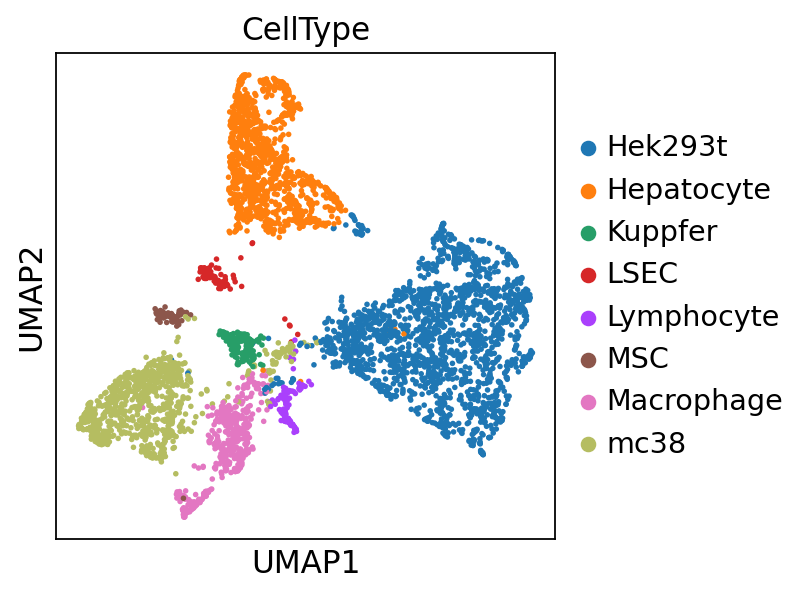

In [31]:
sc.pl.umap(adata, color='CellType')

### Load in the Platemap

In [32]:
plate_map = prefix + 'plate23_map.csv'
spatial_map = pd.read_csv(plate_map, header=None, names=['barcode', 'X', 'Y'])

In [33]:
cutoff = 0

In [34]:
def hexagon(x, y, c='k'):
    points = [[x + (2/3), y],
              [x + (1/3), y + 0.5],
              [x - (1/3), y + 0.5],
              [x - (2/3), y],
              [x - (1/3), y - 0.5],
              [x + (1/3), y - 0.5]]
    
    polygon = Polygon(points, edgecolor='w', fc=c,alpha=0.8)
    return polygon

### Pie Chart 

In [35]:
covar = 'CellType'
df = pd.DataFrame(adata.obs[covar])
df['barcode'] = df.index.str[-16:]

In [36]:
df_with_coords = df.merge(spatial_map,on='barcode',how='right')
df_with_coords['count'] = 1
df_with_coords['CellType'] = df_with_coords['CellType'].cat.add_categories('None').fillna('None')
df_with_coords['count'] = df_with_coords['count'].fillna(int(1))
df_counts = df_with_coords.groupby(['CellType', 'X', 'Y']).sum().fillna(0)

In [37]:
color_dict = dict(zip(df['CellType'].value_counts().index.tolist() + ['None'], 
                      adata.uns['CellType_colors'] + ['#ffffff']))

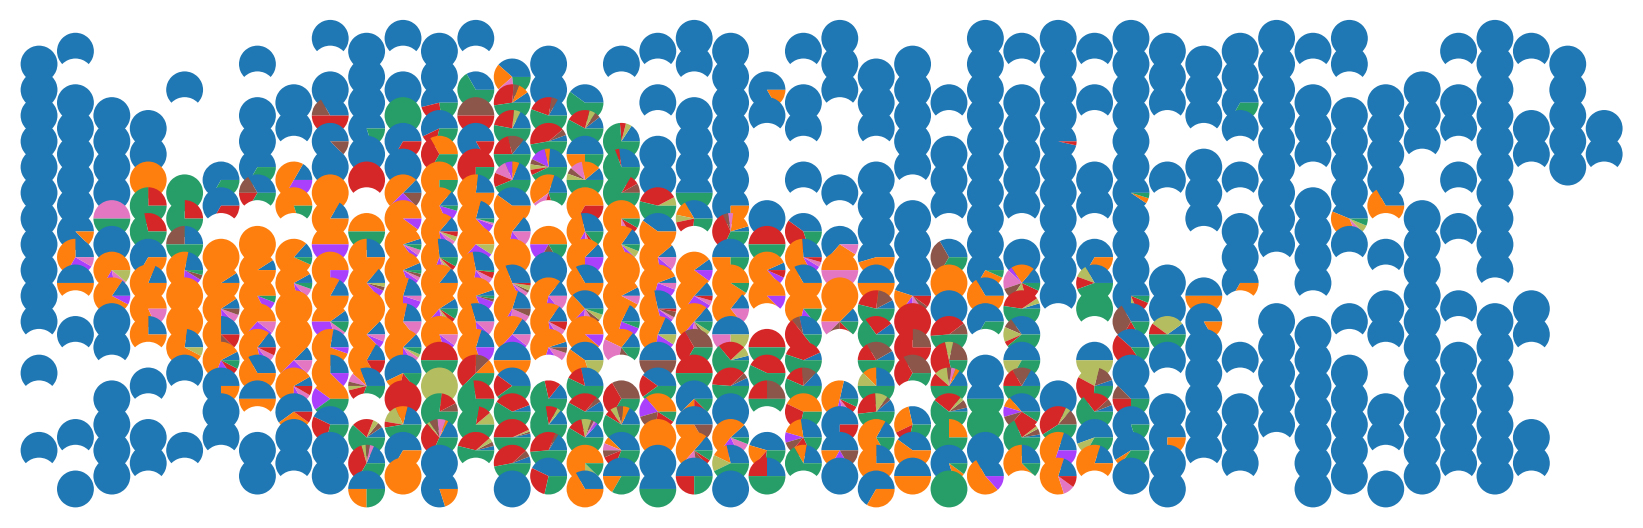

In [42]:
fig8 = plt.figure(constrained_layout=False, figsize=(19, 9))
gs1 = fig8.add_gridspec(nrows=36, ncols=44, left=-0.05, right=0.48, hspace=-0.98,wspace=-.21)

for index, row in tqdm(spatial_map.iterrows()):
    x_coordinate = row['X']-1
    
    if (row['X']-1)  % 2 == 0:
        y_coordinate = ((row['Y']-1)*2)
    else:
        y_coordinate = ((row['Y']*2)-1)
    
    counts = df_counts.xs([row['X'], row['Y']], 
                          level=['X','Y'])['count']
    
    color_list=[]
    for i in counts.index:
        color_list.append(color_dict[i])
    
    
    ax = fig8.add_subplot(gs1[y_coordinate,x_coordinate])
    ax.pie(counts.values, colors=color_list)
    
    
  #  df__.loc[barcode].plot.pie('count')
# fig8.savefig('/Users/derekbogdanoff/Desktop/test.svg', bbox_inches='tight')

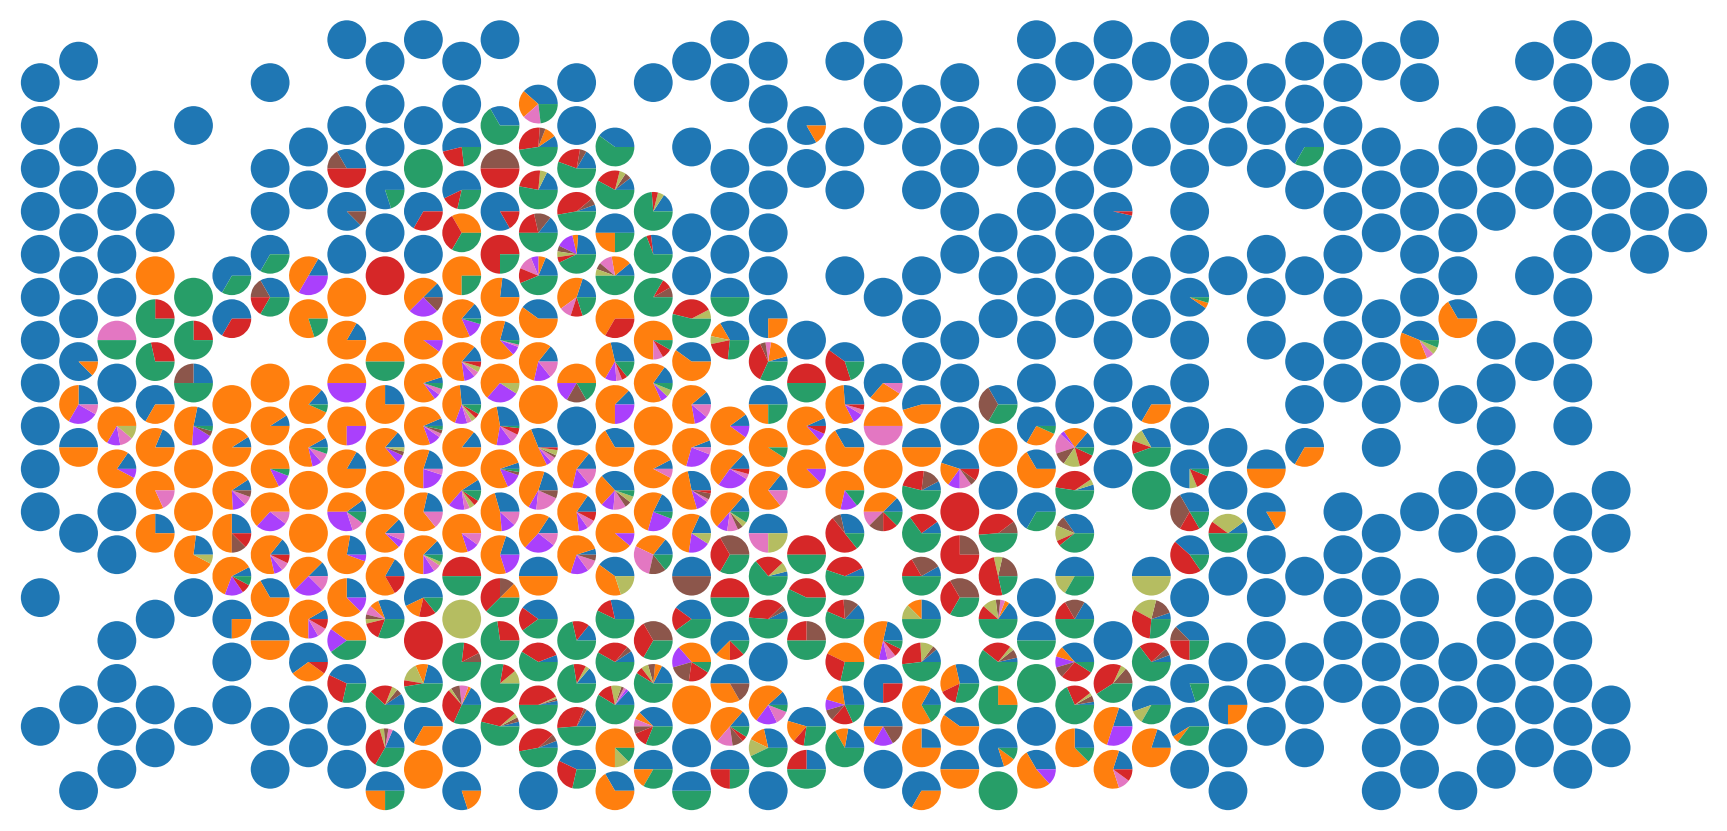

In [44]:
fig8 = plt.figure(constrained_layout=False, figsize=(20, 15))
gs1 = fig8.add_gridspec(nrows=36, ncols=44, left=-0.05, right=0.48, hspace=-0.98,wspace=-.21)

for index, row in tqdm(spatial_map.iterrows()):
    x_coordinate = row['X']-1
    
    if (row['X']-1)  % 2 == 0:
        y_coordinate = ((row['Y']-1)*2)
    else:
        y_coordinate = ((row['Y']*2)-1)
    
    counts = df_counts.xs([row['X'], row['Y']], 
                          level=['X','Y'])['count']
    
    color_list=[]
    for i in counts.index:
        color_list.append(color_dict[i])
    
    
    ax = fig8.add_subplot(gs1[y_coordinate,x_coordinate])
    ax.pie(counts.values, colors=color_list)